<a href="https://colab.research.google.com/github/KhaiHuy123/movie-recommendation-system/blob/main/Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/dataset_RS'

%cd $path
%pwd $path
os.chdir('/content/drive/MyDrive/Colab Notebooks/dataset_RS')

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/dataset_RS


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## read & explore data  

Some information about datasets used in this project. Here is some notice from auhtors who provide those datasets


- This dataset (ml-25m) describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service. It contains 25000095 ratings and 1093360 tag applications across 62423 movies. These data were created by 162541 users between January 09, 1995 and November 21, 2019. This dataset was generated on November 21, 2019.

- Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

- The data are contained in the files `genome-scores.csv`, `genome-tags.csv`, `links.csv`, `movies.csv`, `ratings.csv` and `tags.csv`. More details about the contents and use of all these files follows.

- This and other GroupLens data sets are publicly available for download at <http://grouplens.org/datasets/>.



So as you can see, this dataset is completely public . Here I create something is to build movie search engine. Hope you like it.

In [3]:
# READ MOVIES DATA
movies = pd.read_csv('movies.csv')

In [4]:
movies.tail(200)

,movieId,title,genres
62223,208377,Adopt a Highway (2019),Drama
62224,208381,We Who Stayed Behind (2008),(no genres listed)
62225,208383,Why Don't You Just Die! (2018),Comedy
62226,208385,Holiday in the Wild (2019),Drama|Romance
62227,208389,Tomme tønner (2010),Action|Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [5]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [6]:
# READ LINKS DATA
links = pd.read_csv('links.csv')

In [7]:
links.tail(1000)

,movieId,imdbId,tmdbId
61423,205863,92247,244308.0
61424,205865,116511,124620.0
61425,205867,73028,142965.0
61426,205869,3119922,240852.0
61427,205871,62515,149308.0
...,...,...,...
62418,209157,6671244,499546.0
62419,209159,297986,63407.0
62420,209163,6755366,553036.0
62421,209169,249603,162892.0


In [8]:
links.isna().sum()

movieId      0
imdbId       0
tmdbId     107
dtype: int64

In [9]:
# READ RATTINGS DATA
ratings = pd.read_csv("ratings.csv")

In [10]:
ratings.tail(185)

,userId,movieId,rating,timestamp
24999910,162540,69526,4.5,1249028189
24999911,162540,69644,4.5,1248860374
24999912,162540,69844,4.5,1248860696
24999913,162541,29,5.0,1240953540
24999914,162541,32,5.0,1240949283
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [11]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [12]:
# READ TAGS DATA
tags= pd.read_csv('tags.csv')

In [13]:
tags.tail(100)

,userId,movieId,tag,timestamp
1093260,162440,318,great performances,1562356547
1093261,162440,318,great soundtrack,1562356572
1093262,162440,318,great story,1562356482
1093263,162440,318,gripping,1562356788
1093264,162440,318,gritty,1562356791
...,...,...,...,...
1093355,162521,66934,Neil Patrick Harris,1427311611
1093356,162521,103341,cornetto trilogy,1427311259
1093357,162534,189169,comedy,1527518175
1093358,162534,189169,disabled,1527518181


In [14]:
tags.isna().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [15]:
tag = tags['tag'].value_counts().index
tag

Index(['sci-fi', 'atmospheric', 'action', 'comedy', 'surreal',
       'based on a book', 'twist ending', 'funny', 'visually appealing',
       'dystopia',
       ...
       'driving lessons', 'actually filmed in Pittsburg',
       'fake New York settings', 'haunted farm', 'filmed in Budapest',
       'teen sleuth', 'evil twins', 'paternity test', 'QVC',
       'cornetto triolgy'],
      dtype='object', length=73050)

In [16]:
# READ GENOME_SCORE DATA
genome_scores = pd.read_csv('genome-scores.csv')

In [17]:
genome_scores.tail(1129)

,movieId,tagId,relevance
15583319,205425,1128,0.02850
15583320,206499,1,0.10050
15583321,206499,2,0.09325
15583322,206499,3,0.02225
15583323,206499,4,0.04550
...,...,...,...
15584443,206499,1124,0.11000
15584444,206499,1125,0.04850
15584445,206499,1126,0.01325
15584446,206499,1127,0.14025


In [18]:
genome_scores.isna().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

In [19]:
# READ GEONOME_TAGS DATA
genome_tags = pd.read_csv('genome-tags.csv')

In [20]:
genome_tags

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
...,...,...
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie


In [21]:
genome_tags.isna().sum()

tagId    0
tag      0
dtype: int64

In [22]:
display(movies.head(2) )
display(ratings.head(2) )
display(genome_scores.head(2) )
display(genome_tags.head(2) )
display(links.head(2) )

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817


,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375


,tagId,tag
0,1,007
1,2,007 (series)


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0


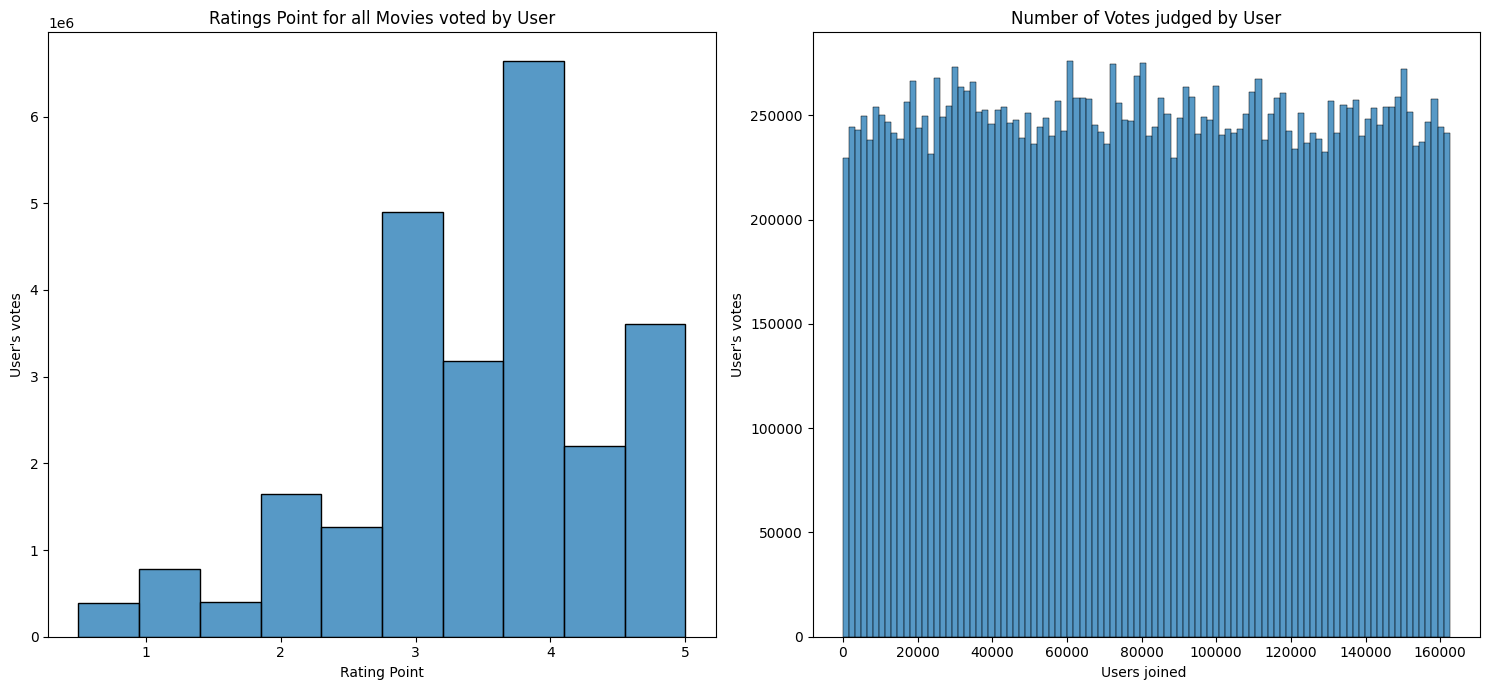

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

sns.histplot(data=ratings['rating'], bins=10, ax=axes[0])
axes[0].set_xlabel('Rating Point')
axes[0].set_ylabel("User's votes")
axes[0].set_title('Ratings Point for all Movies voted by User')

sns.histplot(data=ratings['userId'], bins=100, ax=axes[1])
axes[1].set_xlabel('Users joined ')
axes[1].set_ylabel("User's votes")
axes[1].set_title('Number of Votes judged by User')

plt.tight_layout()
plt.show()

## search engine

In [62]:
import re
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as widgets
from IPython.display import display, clear_output
from IPython.display import display, HTML

class MovieSearchEngine:
    def __init__(self, movies, ratings, genome_scores, genome_tags, tags, links):
        self.movies = movies
        self.ratings = ratings
        self.genome_scores = genome_scores
        self.genome_tags = genome_tags
        self.tags = tags
        self.links = links

        self.movies["clean_title"] = self.movies["title"].apply(self.clean_title)

        self.custom_input = """
            <style>
                .custom-input {
                    display: flex;
                    align-items: center;
                    margin-bottom: 10px;
                }
                .custom-input label {
                    margin-right: 10px;
                    color: #333;
                }
                .custom-input input[type="text"] {
                    padding: 5px;
                    font-size: 14px;
                    border: 5px solid #ddd; /* Thay đổi màu sắc viền input */
                    background-color: #DDDDDD; /* Thay đổi màu nền input */
                    color: #333; /* Thay đổi màu chữ input */
                }
            </style>
        """

        self.custom_slider = """
            <style>
                .custom-slider {
                    background-color: #4287f5;
                    border: none;
                    border-radius: 10px; /* Thay đổi góc bo tròn của slider */
                    height: 10px; /* Thay đổi chiều cao của slider */
                    margin-right: 10px;
                }
                .custom-slider label {
                    margin-right: 10px;
                    color: #333;
                }
            </style>
        """

        display(HTML(f"<style>{self.custom_input}</style>"))
        display(HTML(f"<style>{self.custom_slider}</style>"))

        self.movie_input = widgets.Text(value="Attack on Titan", description="Movie Title", disabled=False)
        self.movie_input.add_class("custom-input")

        self.star_rating_input = widgets.FloatSlider(value=2, min=0, max=5, step=0.5, description="Lowest Point", disabled=False)
        self.star_rating_input.add_class("custom-slider")

        self.movie_list = widgets.Output()
        self.details_list = widgets.Output()

        self.movie_input.observe(self.on_type, names="value")
        self.star_rating_input.observe(self.on_rating_change, names="value")

    def search_engine(self, title):
        clean_title = lambda title: re.sub("[()]", "", title)
        vectorizer = TfidfVectorizer(ngram_range=(1, 2))
        tfidf = vectorizer.fit_transform(self.movies["clean_title"])
        query_vec = vectorizer.transform([clean_title(title)])
        similarity = cosine_similarity(query_vec, tfidf).flatten()
        indices = np.argpartition(similarity, -7)[-7:][::-1]
        results = self.movies.drop('clean_title', axis=1, inplace=False).iloc[indices]
        return results

    def get_more_info(self, results, star_rating):
        details_html = "<div style='font-size: 16px;'>"
        details_html += "<h2>DETAILS</h2>"

        for _, row in results.iterrows():
            details_html += f"<hr><h3>Title: {row['title']}</h3>"
            details_html += f"<p>Genres: {row['genres']}</p>"
            details_html += f"<p>MovieId: {row['movieId']}</p>"

            ratings_info = self.ratings[(self.ratings['movieId'] == row['movieId']) & (self.ratings['rating'] >= star_rating)]
            if not ratings_info.empty:
                ratings_html = "<h4>RATINGS STAT:</h4>"
                ratings_html += "<ul>"
                for value, count in ratings_info['rating'].value_counts().items():
                    ratings_html += f"<li>{value} stars: {count} votes</li>"
                ratings_html += "</ul>"
                ratings_html += f"<p>Total voted: {ratings_info.shape[0]}</p>"
                details_html += ratings_html

            genome_info = self.genome_scores[self.genome_scores['movieId'] == row['movieId']]
            relevant_tags = genome_info.merge(self.genome_tags, on='tagId')
            if not relevant_tags.empty:
                tags_html = "<h4>RELEVANT TAGS RECOMMENDED:</h4>"
                list_tag = relevant_tags['tag'][relevant_tags['relevance'] >= 0.8].tolist()
                if len(list_tag) > 5:
                    tags_html += f"<p>{', '.join(relevant_tags['tag'][relevant_tags['relevance'] >= 0.97].tolist())}</p>"
                else:
                    tags_html += f"<p>{', '.join(list_tag)}</p>"
                details_html += tags_html

            tag_info = self.tags[self.tags['movieId'] == row['movieId']]
            if not tag_info.empty:
                tags_html = "<h4>ALL POPULAR TAGS:</h4>"
                tags_html += f"<p>{', '.join(tag_info['tag'].tolist())}</p>"
                details_html += tags_html

            links_info = self.links[self.links['movieId'] == row['movieId']]
            if not links_info.empty:
                links_html = "<h4>LINKS:</h4>"
                links_html += links_info.to_html(index=False)
                details_html += links_html

        details_html += "</div>"
        display(HTML(details_html))

    def clean_title(self, title):
        return re.sub("[()]", "", title)

    def clear_all(self):
        self.movie_list.clear_output()
        self.details_list.clear_output()

    def on_type(self, data):
        self.star_rating_input.value = 2
        with self.movie_list:
            self.clear_all()
            title = data["new"]
            if len(title) > 5:
                results = self.search_engine(title)
                display(results)

    def on_rating_change(self, change):
        title = self.movie_input.value
        star_rating = self.star_rating_input.value
        results = self.search_engine(title)

        with self.details_list:
            self.details_list.clear_output()
            self.get_more_info(results, star_rating)

    def display_widgets(self):
        display(self.movie_input, self.star_rating_input, self.movie_list, self.details_list)

    def execute(self):
        self.display_widgets()

if __name__ == "__main__":
    search_engine = MovieSearchEngine(movies, ratings, genome_scores, genome_tags, tags, links)
    search_engine.execute()

Text(value='Attack on Titan', description='Movie Title', _dom_classes=('custom-input',))

FloatSlider(value=2.0, description='Lowest Point', max=5.0, step=0.5, _dom_classes=('custom-slider',))

Output()

Output()

## beta version

In [25]:
import re
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as widgets
from IPython.display import display, clear_output

class MovieSearchEngine:
    def __init__(self, movies, ratings, genome_scores, genome_tags, tags, links):
        self.movies = movies
        self.ratings = ratings
        self.genome_scores = genome_scores
        self.genome_tags = genome_tags
        self.tags = tags
        self.links = links

        self.movies["clean_title"] = self.movies["title"].apply(self.clean_title)

        self.movie_input = widgets.Text(value="Attack on Titan", description="Movie Title", disabled=False)
        self.star_rating_input = widgets.FloatSlider(value=2, min=0, max=5, step=0.5, description="Lowest Point", disabled=False)

        self.movie_list = widgets.Output()
        self.details_list = widgets.Output()

        self.movie_input.observe(self.on_type, names="value")
        self.star_rating_input.observe(self.on_rating_change, names="value")

    def search_engine(self, title):
        clean_title = lambda title: re.sub("[()]", "", title)
        vectorizer = TfidfVectorizer(ngram_range=(1, 2))
        tfidf = vectorizer.fit_transform(self.movies["clean_title"])
        query_vec = vectorizer.transform([clean_title(title)])
        similarity = cosine_similarity(query_vec, tfidf).flatten()
        indices = np.argpartition(similarity, -7)[-7:][::-1]
        results = self.movies.drop('clean_title', axis=1, inplace=False).iloc[indices]
        return results

    def get_more_info(self, results, star_rating):
        print('\nDETAILS\n')
        for _, row in results.iterrows():
            print("=" * 150)
            print(f"Title : {row['title']}")
            print(f"Genres : {row['genres']}")
            print(f"MovieId : {row['movieId']}")

            ratings_info = self.ratings[(self.ratings['movieId'] == row['movieId']) & (self.ratings['rating'] >= star_rating)]
            if not ratings_info.empty:
                print("-" * 30)
                print("RATINGS STAT:")
                point, voted = [], []
                for value, count in ratings_info['rating'].value_counts().items():
                    point.append(value)
                    voted.append(count)
                data = {"point": point, "voted": voted}
                report = pd.DataFrame(data)
                display(report)
                print('Total voted : {}'.format(ratings_info.shape[0]))

            genome_info = self.genome_scores[self.genome_scores['movieId'] == row['movieId']]
            relevant_tags = genome_info.merge(self.genome_tags, on='tagId')
            if not relevant_tags.empty:
                print("-" * 30)
                list_tag = relevant_tags['tag'][relevant_tags['relevance'] >= 0.8].tolist()
                if len(list_tag) > 5:
                    print('RELEVANT TAGS RECOMMENDED : {}'.format(relevant_tags['tag'][relevant_tags['relevance'] >= 0.97].tolist()))
                else:
                    print('RELEVANT TAGS RECOMMENDED : {}'.format(list_tag))

            tag_info = self.tags[self.tags['movieId'] == row['movieId']]
            if not tag_info.empty:
                print("-" * 30)
                print('ALL POPULAR TAGS : {}'.format(tag_info['tag'].tolist()))

            links_info = self.links[self.links['movieId'] == row['movieId']]
            if not links_info.empty:
                print("-" * 30)
                print("LINKS :")
                display(links_info)

    def clean_title(self, title):
        return re.sub("[()]", "", title)

    def clear_all(self):
        self.movie_list.clear_output()
        self.details_list.clear_output()

    def on_type(self, data):
        self.star_rating_input.value = 2
        with self.movie_list:
            self.clear_all()
            title = data["new"]
            if len(title) > 5:
                results = self.search_engine(title)
                display(results)

    def on_rating_change(self, change):
        title = self.movie_input.value
        star_rating = self.star_rating_input.value
        results = self.search_engine(title)

        with self.details_list:
            self.details_list.clear_output()
            self.get_more_info(results, star_rating)

    def display_widgets(self):
        display(self.movie_input, self.star_rating_input, self.movie_list, self.details_list)

    def execute(self):
        self.display_widgets()

if __name__ == "__main__":
    search_engine = MovieSearchEngine(movies, ratings, genome_scores, genome_tags, tags, links)
    search_engine.execute()

Text(value='Attack on Titan', description='Movie Title')

FloatSlider(value=2.0, description='Lowest Point', max=5.0, step=0.5)

Output()

Output()